In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First Impression

In [111]:
def npz_loader(filepath):
	try:
		npz = np.load(filepath)
		
		X = npz["trX"]
		y = npz["trY"]

		df = pd.DataFrame(X)
		df["target"] = y.ravel()
		df = df.drop(columns=[0])
		column_names = [
    	'season', 'year', 'month', 'hour', 
    	'holiday', 'weekday', 'workingDay', 'weather', 
    	'temp', 'atemp', 'humidity', 'windspeed', 'cnt'
		]
		df.columns = column_names

	except Exception as e:
		print(f"Error loading file: {e}")
		return None

	return df
	
df = npz_loader("bike_sharing.npz")

In [152]:
categorical_features = [
	'season', 'year', 'month', 'hour', 
	'holiday', 'weekday', 'workingDay', 'weather'
]
continuous_features =[
	'temp', 'atemp', 'humidity', 'windspeed'
]

print(f"{'-'*8} * DATA HEAD * {'-'*8}")
print(df.head())

print(f"\n{'-'*6} * DESCRIBE DATA * {'-'*6}")
print("Shape:", df.shape)
print("Missing value:", df.isnull().sum().sum())
print(df.describe())

print(f"\n{'-'*6} * CATEGORY * {'-'*6}")
print(df[categorical_features].nunique())

-------- * DATA HEAD * --------
     season      year     month      hour   holiday   weekday  workingDay  \
0 -1.356634  0.994892 -1.610438  1.077962 -0.172112 -1.497563    -1.46690   
1 -0.453199 -1.005134 -0.447200 -1.236115 -0.172112 -0.500412     0.68171   
2  1.353671  0.994892  1.006848 -0.802225 -0.172112 -0.998987     0.68171   
3 -0.453199 -1.005134 -1.028819 -0.802225 -0.172112  1.493891    -1.46690   
4  0.450236 -1.005134  0.425229  1.656481 -0.172112 -0.001836     0.68171   

    weather      temp     atemp  humidity  windspeed  cnt  
0 -0.665193 -1.750123 -1.798566 -1.333315  -0.211691  110  
1 -0.665193  0.223385  0.229421  1.051040   0.764304    2  
2  0.898924  0.327253  0.317291  0.532702   0.886099  147  
3 -0.665193 -1.646254 -1.710696 -0.400306   0.031899   10  
4 -0.665193  1.262073  1.022576 -1.333315  -0.821484  108  

------ * DESCRIBE DATA * ------
Shape: (13904, 13)
Missing value: 0
             season          year         month          hour       holiday 

# Data Plotting

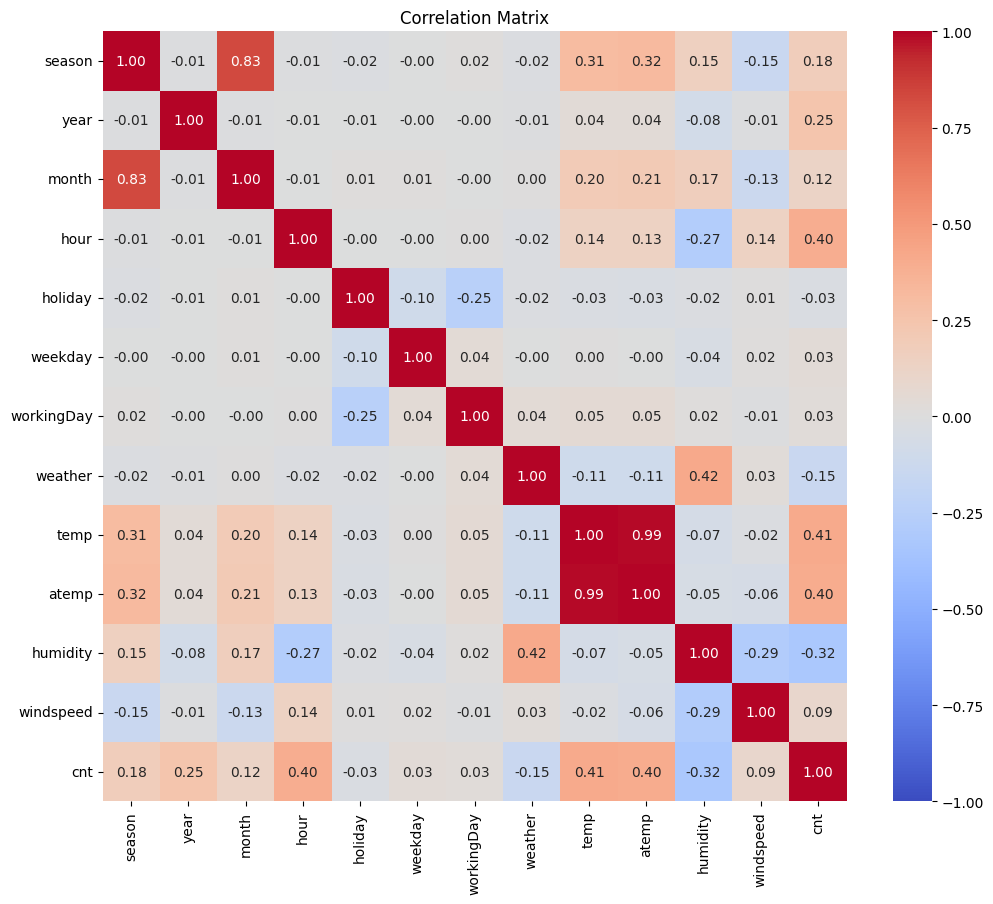

In [113]:
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

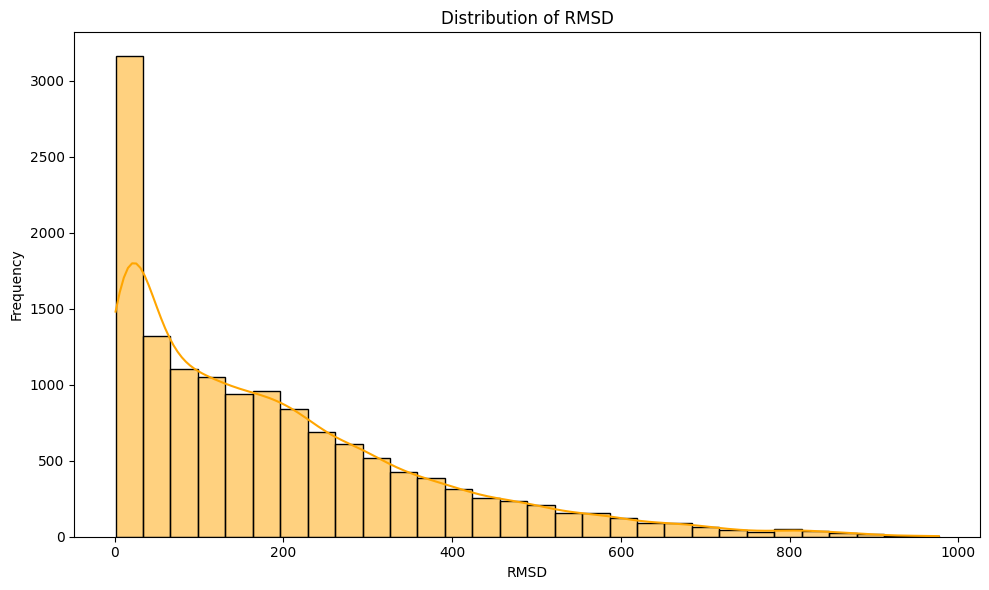

In [114]:
plt.figure(figsize=(10, 6))

sns.histplot(df["cnt"], bins=30, kde=True, color='orange')
plt.title("Distribution of RMSD")
plt.xlabel("RMSD")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

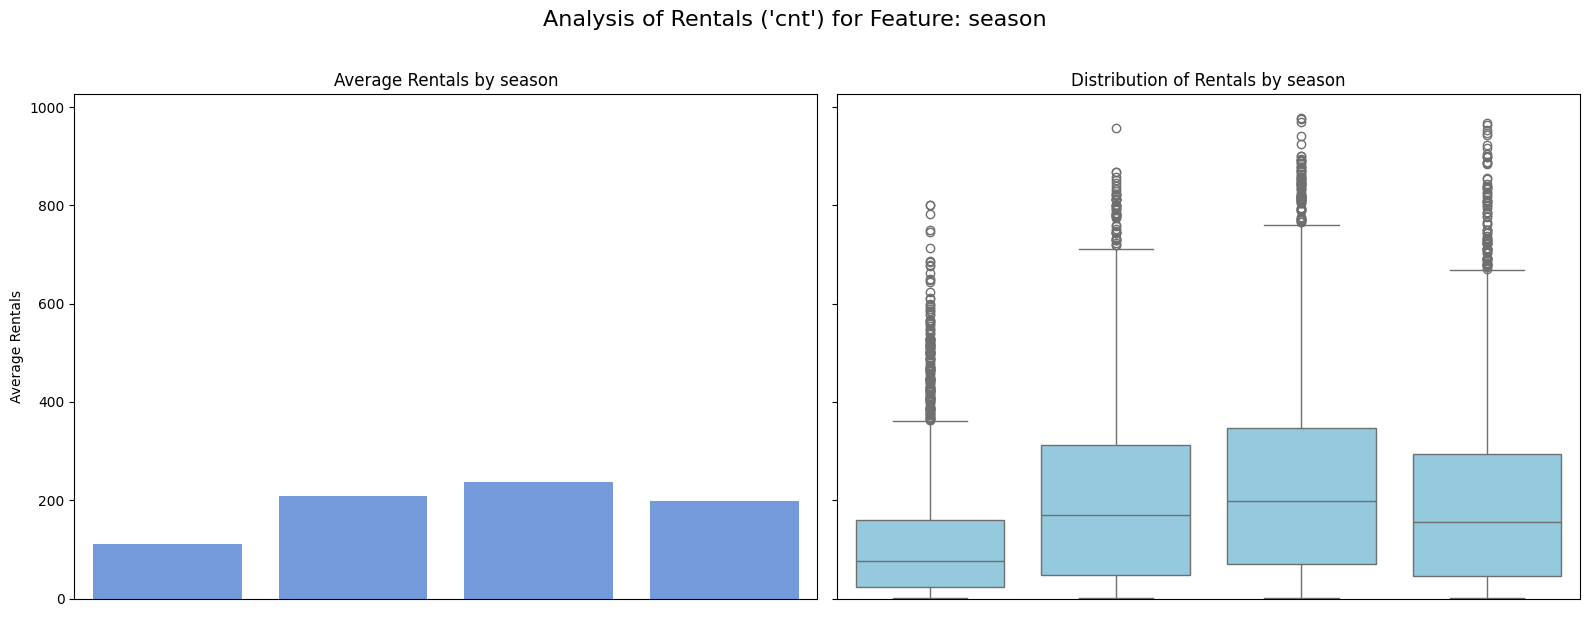

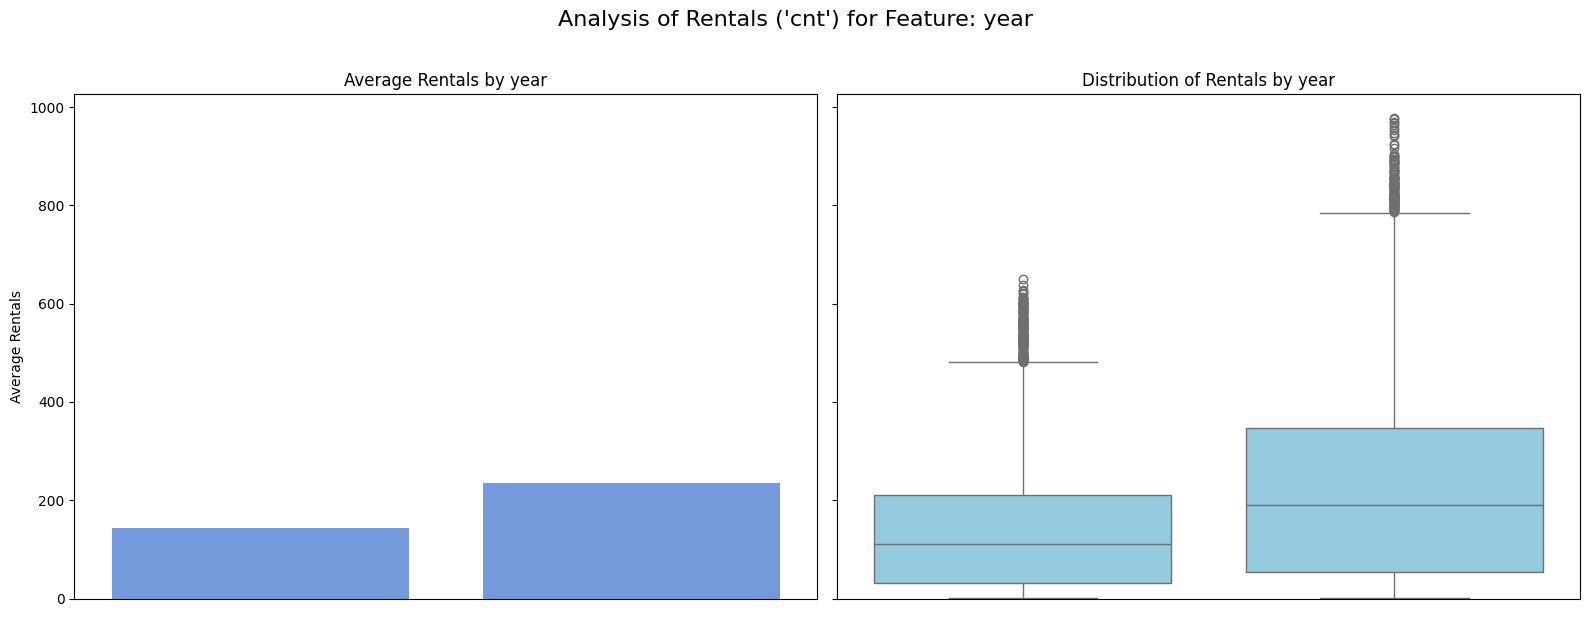

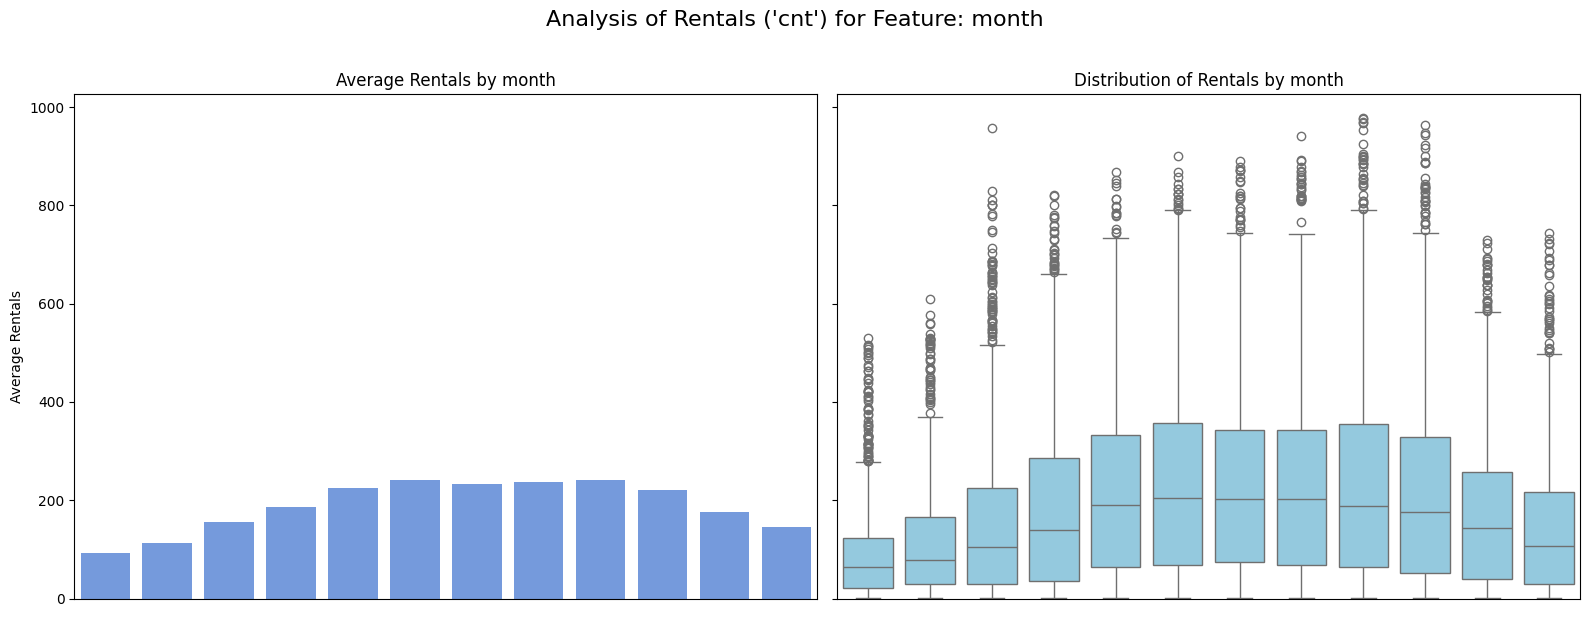

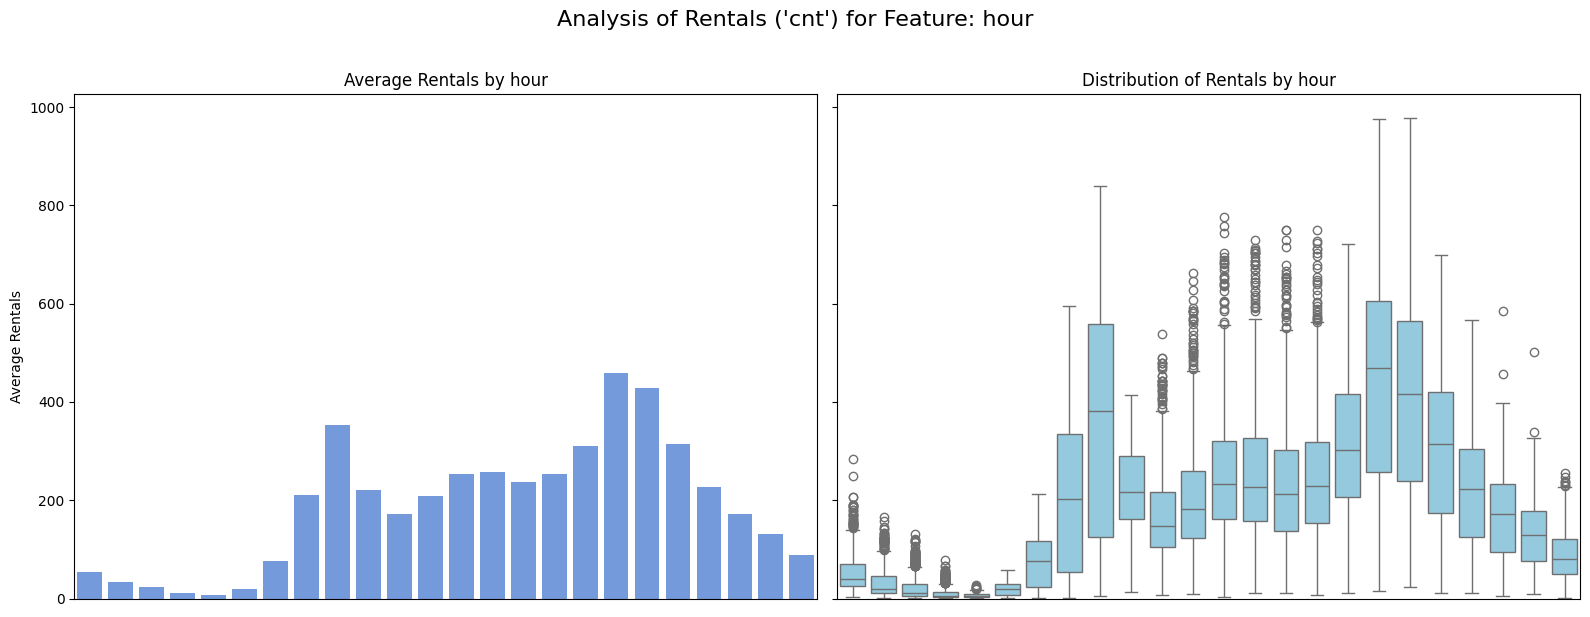

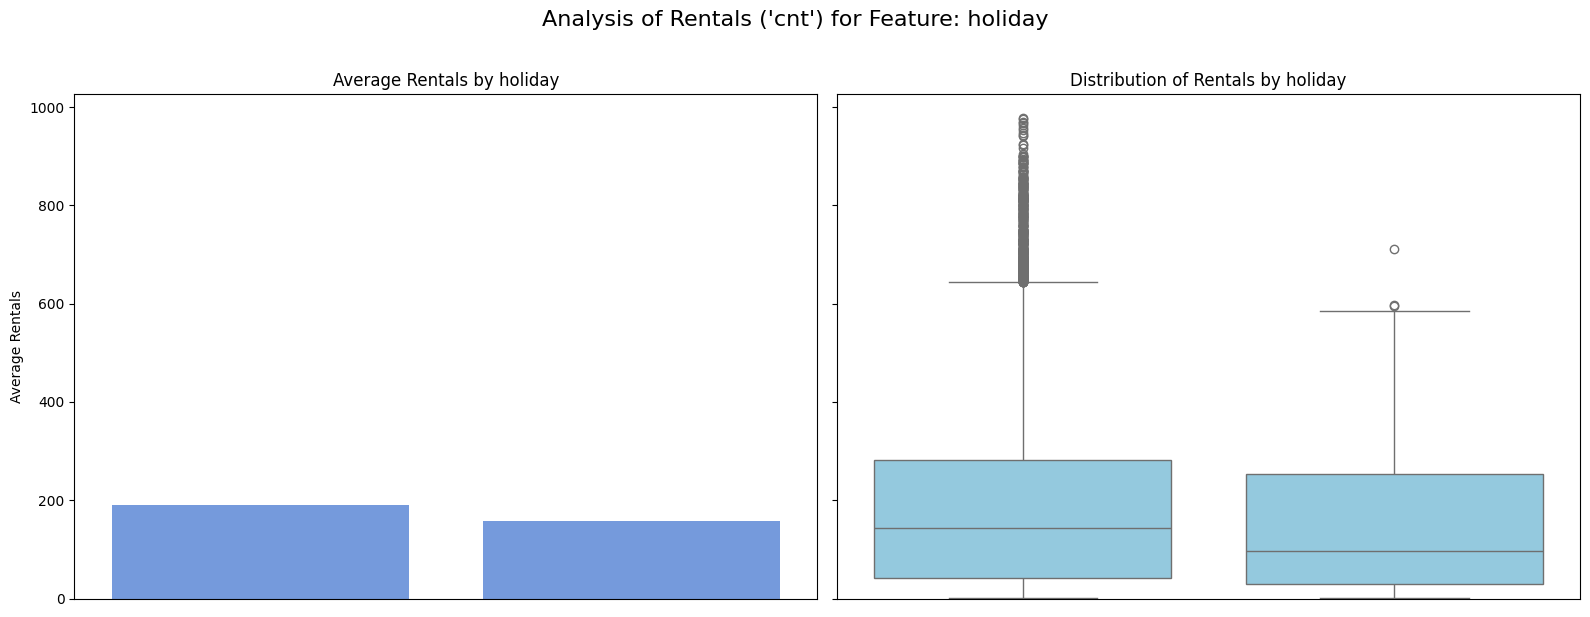

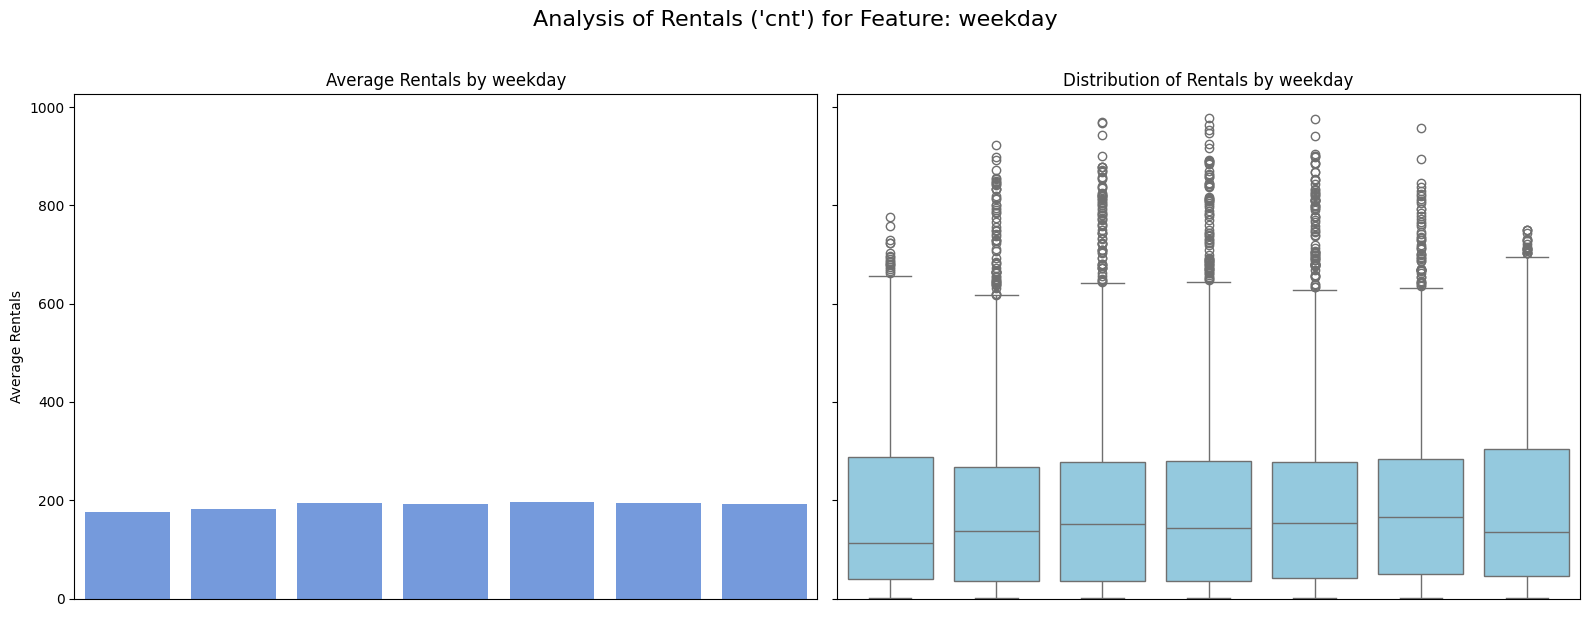

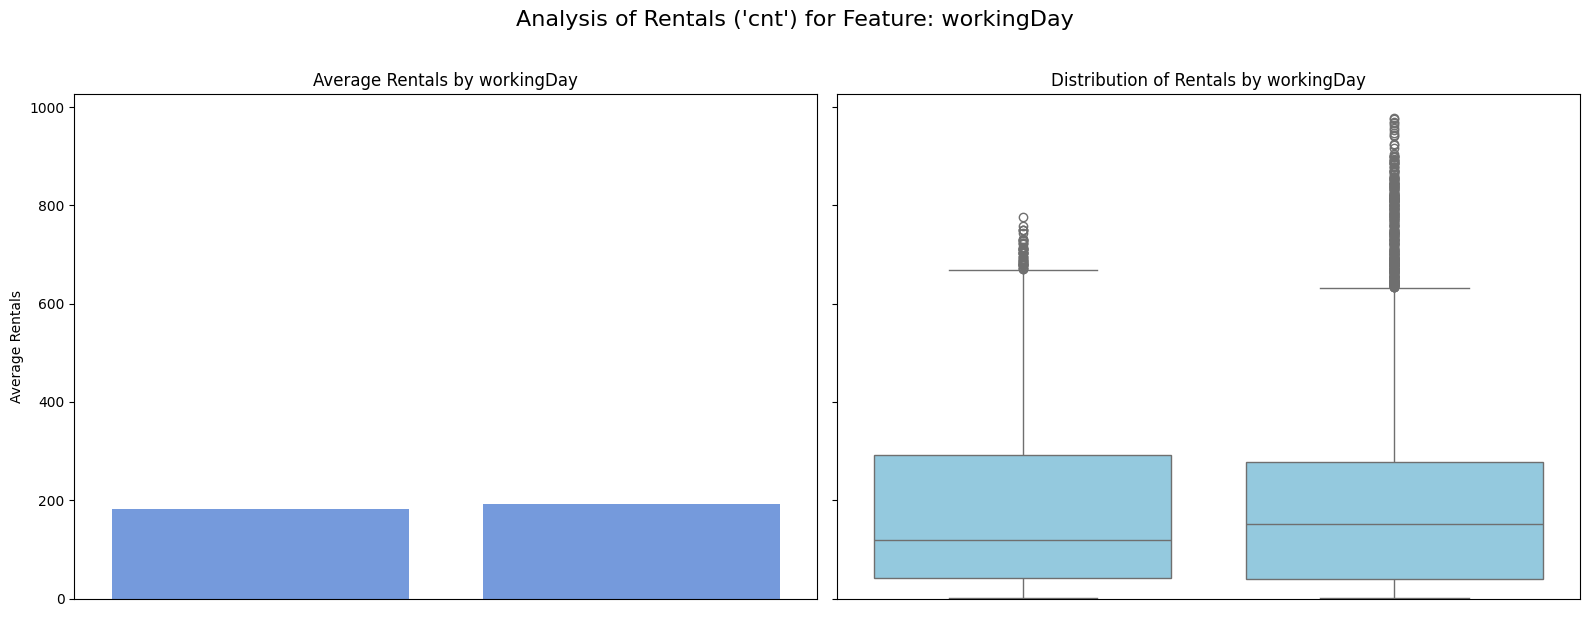

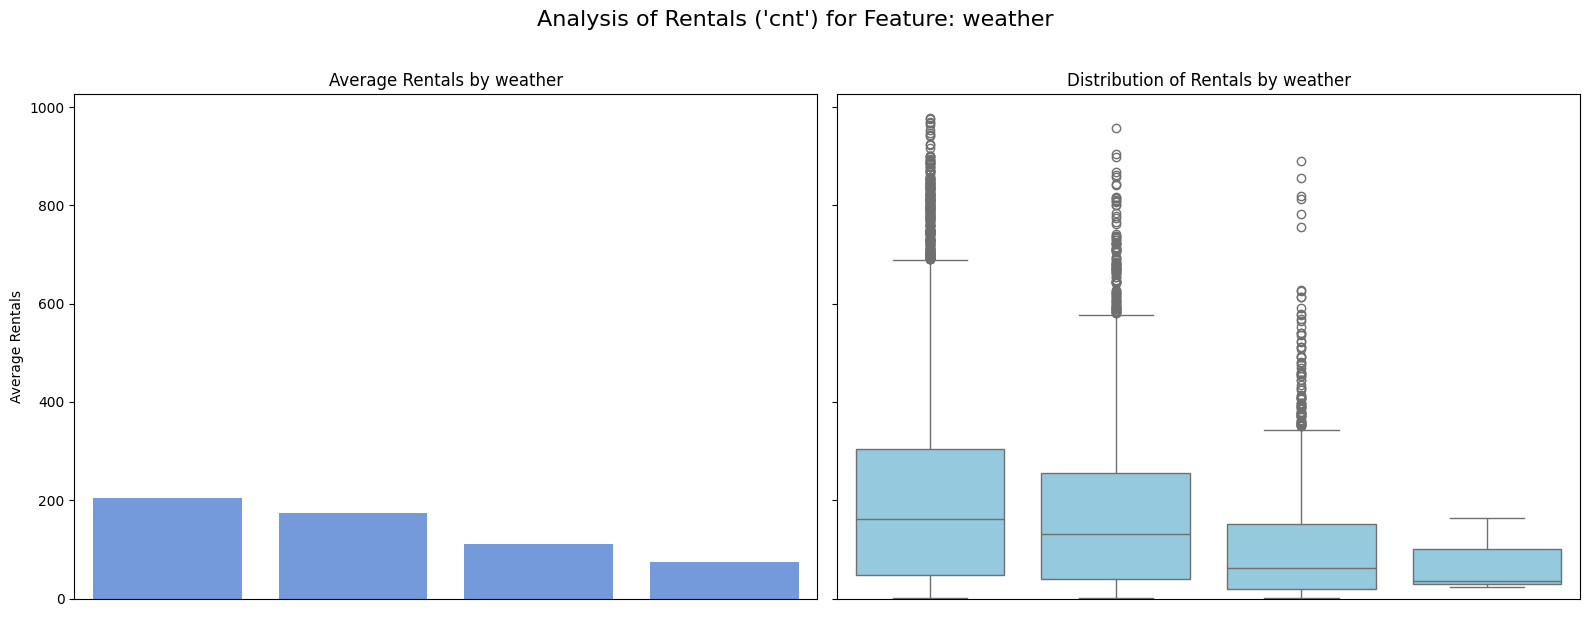

In [ ]:
# CATEGORICAL PLOTTING
for feature in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True) 
    # BAR PLOT
    sns.barplot(
        x=feature, 
        y='cnt', 
        data=df, 
        color='cornflowerblue', 
        errorbar=None, 
        ax=axes[0]
    )
    axes[0].set_title(f"Average Rentals by {feature}")
    axes[0].set_ylabel("Average Rentals")
    axes[0].set_xlabel(feature)
    axes[0].xaxis.set_visible(False)

    # BOX PLOT
    sns.boxplot(
        x=feature, 
        y='cnt', 
        data=df, 
        color='skyblue', 
        ax=axes[1]
    )
    axes[1].set_title(f"Distribution of Rentals by {feature}")
    axes[1].set_ylabel("")
    axes[1].set_xlabel(feature)
    axes[1].xaxis.set_visible(False)

    plt.suptitle(f"Analysis of Rentals ('cnt') for Feature: {feature}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()

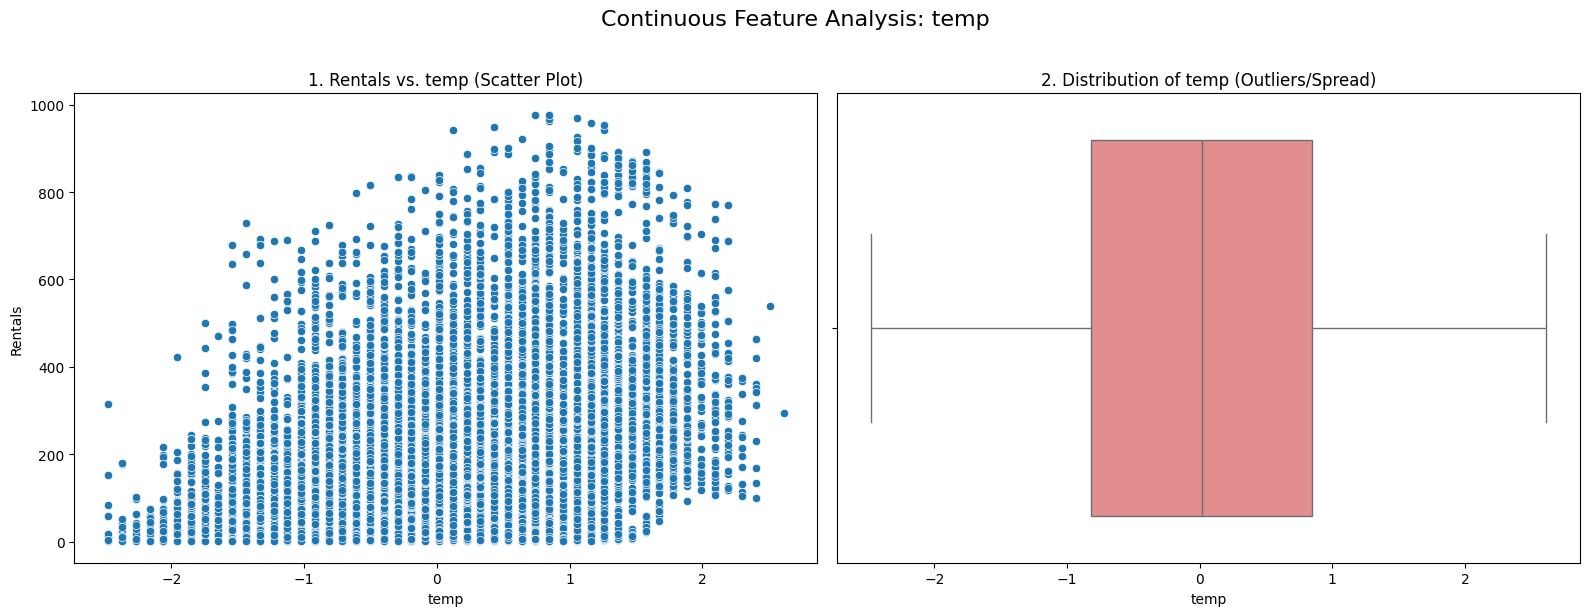

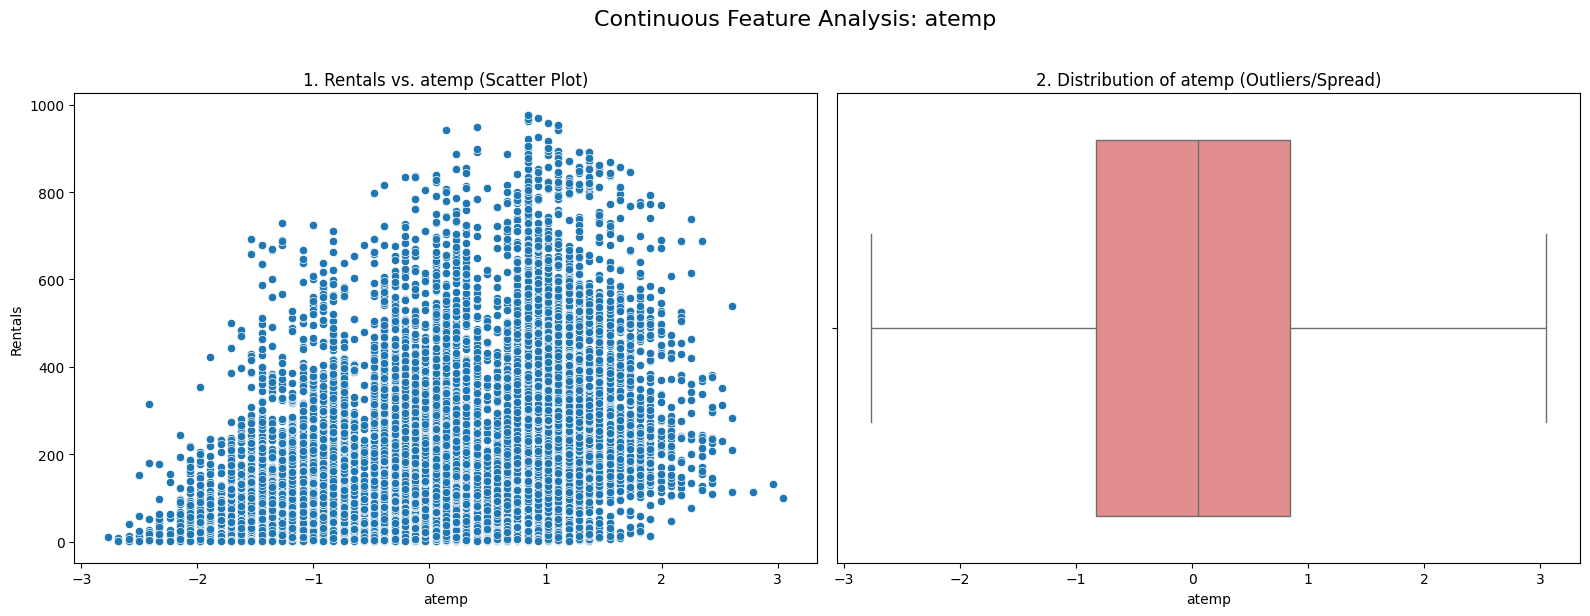

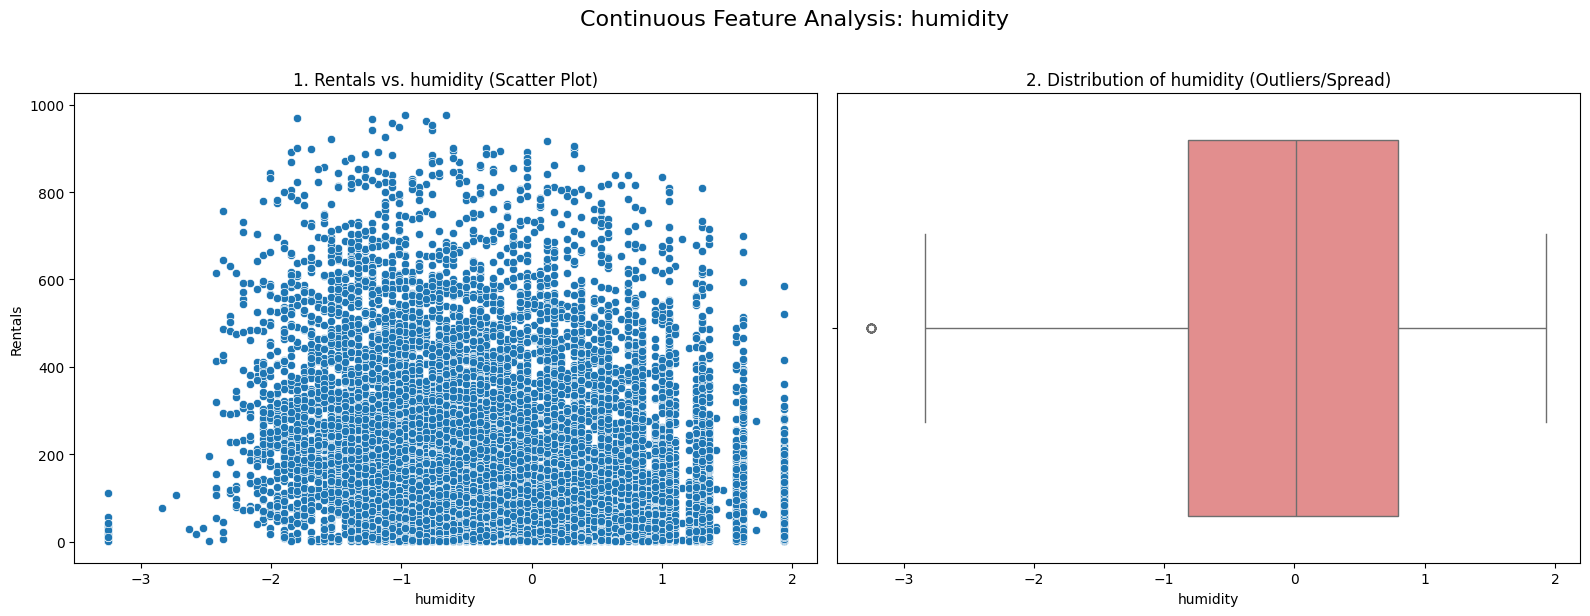

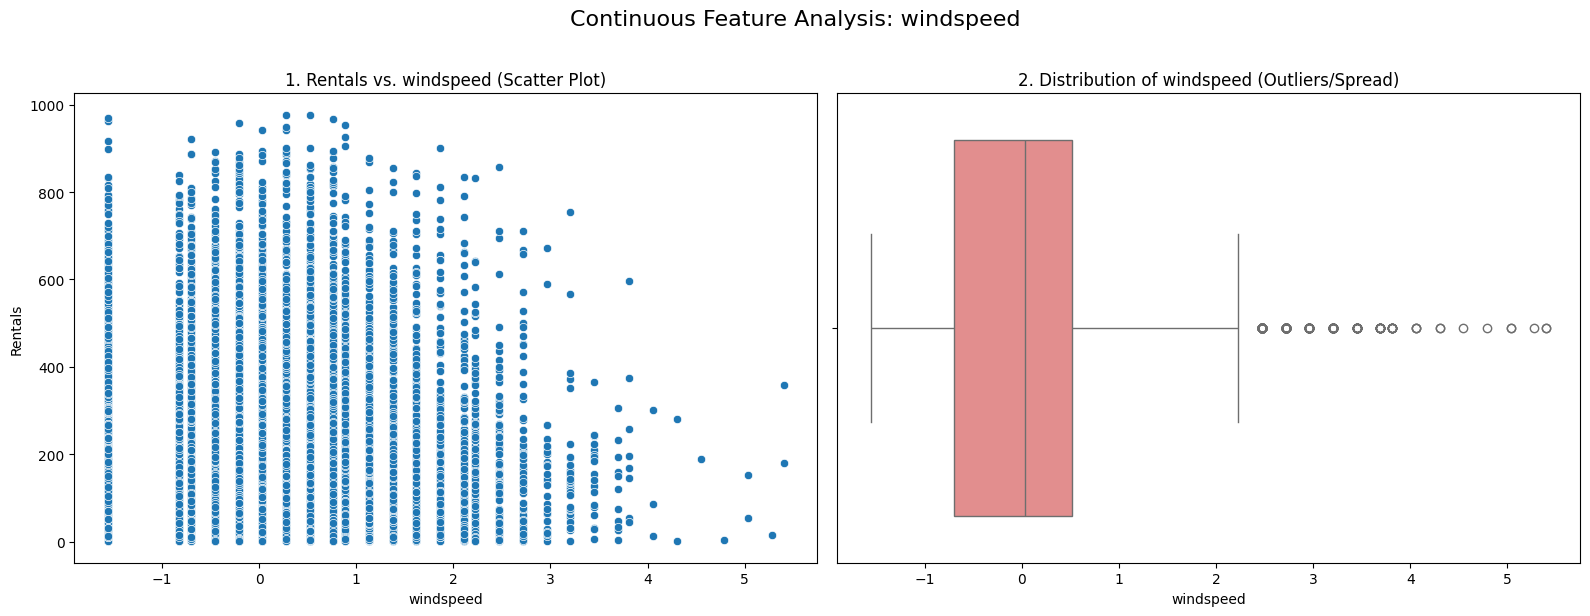

In [ ]:
# CONTINUOUS PLOTTING
for feature in continuous_features:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
	# SCATTER PLOT
    sns.scatterplot(
        x=feature, 
        y="cnt", 
        data=df,
        ax=axes[0] 
    )
    axes[0].set_title(f"1. Rentals vs. {feature} (Scatter Plot)")
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel("Rentals")
    
    # BOX PLOT FEATURES INDEPENDENTLY
    sns.boxplot(
        x=df[feature], 
        color='lightcoral',
        orient='h',
        ax=axes[1]
    )
    axes[1].set_title(f"2. Distribution of {feature}")
    axes[1].set_xlabel(feature)
    axes[1].set_ylabel("")

    plt.suptitle(f"Continuous Feature Analysis: {feature}", fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()